In [7]:
import os
import numpy as np
import pickle

from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Flatten, Dropout, BatchNormalization
from keras import backend as K
from keras.utils import to_categorical
from keras.utils import load_img, img_to_array

import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import tensorflow as tf

## 1. Loading the pictures and creating X and y arrays

In [8]:
X = []
y = []
# 'classes' corresponds to the folder names where the object pictures are saved
classes = ["object1", "object2", "object3", "object4", "object5", "object6"]
# Base path to the folders where the object pictures are saved
base_path = './photos/'

for i, target in enumerate(classes):
    files = os.listdir(base_path+target)
    for file in files:
        path = base_path + target + "/" + file
        # load the image
        img = load_img(
            path=path,
            grayscale=False,
            color_mode='rgb',
            target_size=None,
            interpolation='nearest',
        )
        # convert it to an array
        img_array = img_to_array(img)
        # append the array to X
        X.append(img_array)
        # append the numeric target to y
        y.append(i)

X = np.array(X)
y = np.array(y)

# shuffle the data
shuffler = np.random.permutation(len(X))
X = X[shuffler]
y = y[shuffler]

In [9]:
X.shape, y.shape

((1234, 650, 650, 3), (1234,))

## 2. Train/Test Split

In [13]:
X_train = X[300:]
y_train = y[300:]
X_test = X[:300]
y_test = y[:300]

In [14]:
X_train.shape, y_train.shape

((934, 650, 650, 3), (934,))

In [15]:
X_test.shape, y_test.shape

((300, 650, 650, 3), (300,))

In [16]:
ytest_true = y_test.copy()

In [17]:
# One hot encode the labels:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## 3. Creating the model

In [22]:
# Clear session and build model:
K.clear_session()

model = Sequential([
    Conv2D(filters = 16, kernel_size = (3,3), strides = (1,1), padding = "valid", activation = "relu" ,
           input_shape = (650,650,3)),

    MaxPooling2D(pool_size = (2,2),strides=(2,2),padding = "valid"),

    Conv2D(filters = 16, kernel_size = (3,3), strides = (1,1), padding = "valid", activation = "relu"),

    MaxPooling2D(pool_size = (2,2),strides=(2,2),padding = "valid"),

    Flatten(),

    #Fully connected layers:

    Dense(100,activation='relu'),
    Dropout(0.2),# - optional

    #Output layer:
    Dense(6 ,activation= "softmax")


])

In [23]:
# Check the summary:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 648, 648, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 324, 324, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 322, 322, 16)      2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 161, 161, 16)      0         
_________________________________________________________________
flatten (Flatten)            (None, 414736)            0         
_________________________________________________________________
dense (Dense)                (None, 100)               41473700  
_________________________________________________________________
dropout (Dropout)            (None, 100)               0

In [24]:
# Compile the model
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
# Fit the model
history = model.fit(X_train,y_train,batch_size=100, epochs=12,validation_split=0.2)

Epoch 1/12
8/8 [==============================] - 505s 58s/step - loss: 2955.5479 - accuracy: 0.3333 - val_loss: 385.3798 - val_accuracy: 0.5348
Epoch 2/12
8/8 [==============================] - 452s 56s/step - loss: 149.7020 - accuracy: 0.6975 - val_loss: 65.4989 - val_accuracy: 0.8342
Epoch 3/12
8/8 [==============================] - 415s 51s/step - loss: 19.5757 - accuracy: 0.8474 - val_loss: 4.9382 - val_accuracy: 0.8021
Epoch 4/12
8/8 [==============================] - 406s 51s/step - loss: 3.5116 - accuracy: 0.8608 - val_loss: 0.9443 - val_accuracy: 0.8770
Epoch 5/12
8/8 [==============================] - 405s 49s/step - loss: 1.2262 - accuracy: 0.9250 - val_loss: 0.1536 - val_accuracy: 0.9519
Epoch 6/12
8/8 [==============================] - 373s 46s/step - loss: 1.5891 - accuracy: 0.9357 - val_loss: 0.1597 - val_accuracy: 0.9519
Epoch 7/12
8/8 [==============================] - 378s 46s/step - loss: 0.3771 - accuracy: 0.9612 - val_loss: 0.0674 - val_accuracy: 0.9786
Epoch 8/12


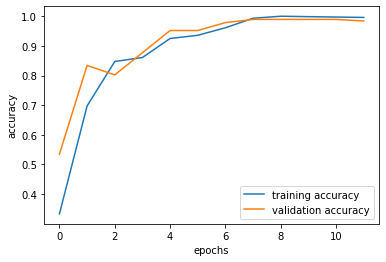

In [26]:
# Plot accuracy curve
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label= 'validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

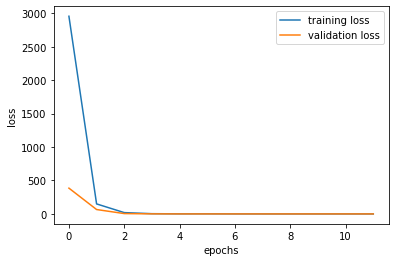

In [27]:
# Plot loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [29]:
y_pred = model.predict(X_test)

In [30]:
y_pred.shape

(300, 6)

In [31]:
np.argmax(y_pred[0])

5

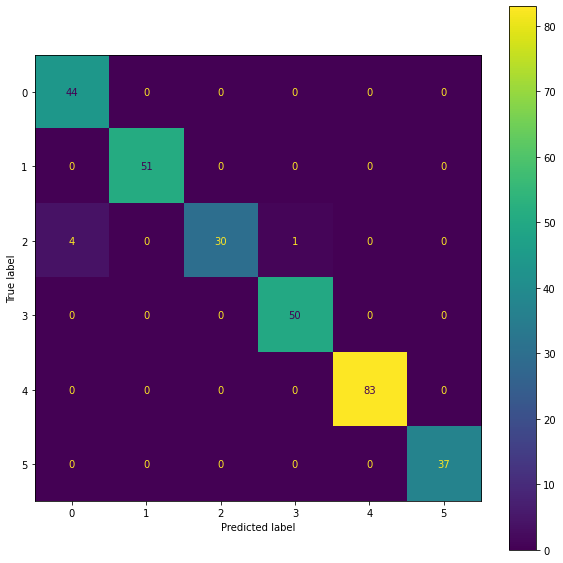

In [32]:
# Plot confusion matrix
cm = confusion_matrix(y_true=ytest_true, y_pred=np.argmax(y_pred, axis=1))

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=np.unique(ytest_true))
fig, ax = plt.subplots(figsize=(10,10))

disp.plot(ax=ax)

## 4. Save the model and X_test/y_test

In [ ]:
tf.keras.models.save_model(model, "./data/model_new")

In [28]:
model.save('./data/model_new')

INFO:tensorflow:Assets written to: ./data/model_new/assets


In [33]:
with open('./data/y_test.bin', 'wb') as f:
    pickle.dump(y_test, f)

In [34]:
with open('./data/X_test.bin', 'wb') as f:
    pickle.dump(X_test, f)

In [35]:
with open('./data/ytest_true.bin', 'wb') as f:
    pickle.dump(ytest_true, f)